### NYC Car Accident Project: Machine Learning
Predicting accident severity of car accidents in NYC with supervised machine learning/classification.

In [84]:
pip install xgboost

     |████████████████████████████████| 1.7 MB 2.1 MB/s eta 0:00:01     |███████▋                        | 409 kB 2.1 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import linalg
import sys
import matplotlib.animation as animation
from IPython.display import HTML
import seaborn as sns
import pandas as pd
import os
import cv2
#import pycaret
# from pycaret.classification import *

import plotly.offline as py
import plotly.graph_objs as go
import plotly.io as pio
pio.renderers.default = "png"

# Ignore printing warnings for general readability
import warnings 
warnings.filterwarnings("ignore")

# pip install scikit-surprise
# Importing libraries for model building & evaluation
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.utils import resample
# from surprise import Reader, Dataset
# from surprise.model_selection import train_test_split, cross_validate, GridSearchCV
# from surprise import accuracy
from sklearn.utils import resample

In [2]:
os.getcwd()

'/Users/jenarriaza/Applied Data Analytics-II'

In [3]:
df = pd.read_csv("Motor_Vehicle_Collisions_-_Crashes.csv", low_memory=False) # KEPLER.GL CAN READ GeoJSON, JSON, CSV
df.head()

,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,...,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
0,06/29/2022,6:55,NaN,NaN,NaN,NaN,NaN,THROGS NECK BRIDGE,NaN,NaN,...,Unspecified,NaN,NaN,NaN,4541903,Sedan,Pick-up Truck,NaN,NaN,NaN
1,06/30/2022,0:17,BROOKLYN,11207,40.669792,-73.89240,"(40.669792, -73.8924)",WYONA STREET,SUTTER AVENUE,NaN,...,NaN,NaN,NaN,NaN,4542062,Taxi,NaN,NaN,NaN,NaN
2,04/14/2021,5:32,NaN,NaN,NaN,NaN,NaN,BRONX WHITESTONE BRIDGE,NaN,NaN,...,Unspecified,NaN,NaN,NaN,4407480,Sedan,Sedan,NaN,NaN,NaN
3,06/29/2022,7:00,NaN,NaN,NaN,NaN,NaN,Wood hill avenue,Sagamore avenue,NaN,...,Unspecified,Unspecified,NaN,NaN,4542269,Sedan,Sedan,Bus,NaN,NaN
4,04/13/2021,21:35,BROOKLYN,11217,40.683580,-73.97617,"(40.68358, -73.97617)",NaN,NaN,620 ATLANTIC AVENUE,...,NaN,NaN,NaN,NaN,4407147,Sedan,NaN,NaN,NaN,NaN


In [3]:
df.isna().sum()

CRASH DATE                             0
CRASH TIME                             0
BOROUGH                           595905
ZIP CODE                          596138
LATITUDE                          222330
LONGITUDE                         222330
LOCATION                          222330
ON STREET NAME                    398501
CROSS STREET NAME                 705089
OFF STREET NAME                  1615548
NUMBER OF PERSONS INJURED             18
NUMBER OF PERSONS KILLED              31
NUMBER OF PEDESTRIANS INJURED          0
NUMBER OF PEDESTRIANS KILLED           0
NUMBER OF CYCLIST INJURED              0
NUMBER OF CYCLIST KILLED               0
NUMBER OF MOTORIST INJURED             0
NUMBER OF MOTORIST KILLED              0
CONTRIBUTING FACTOR VEHICLE 1       5766
CONTRIBUTING FACTOR VEHICLE 2     285421
CONTRIBUTING FACTOR VEHICLE 3    1787552
CONTRIBUTING FACTOR VEHICLE 4    1891928
CONTRIBUTING FACTOR VEHICLE 5    1913724
COLLISION_ID                           0
VEHICLE TYPE COD

In [4]:
df.columns = [x.lower() for x in df.columns]
df.columns = df.columns.str.replace(' ', '_')

In [5]:
df.columns

Index(['crash_date', 'crash_time', 'borough', 'zip_code', 'latitude',
       'longitude', 'location', 'on_street_name', 'cross_street_name',
       'off_street_name', 'number_of_persons_injured',
       'number_of_persons_killed', 'number_of_pedestrians_injured',
       'number_of_pedestrians_killed', 'number_of_cyclist_injured',
       'number_of_cyclist_killed', 'number_of_motorist_injured',
       'number_of_motorist_killed', 'contributing_factor_vehicle_1',
       'contributing_factor_vehicle_2', 'contributing_factor_vehicle_3',
       'contributing_factor_vehicle_4', 'contributing_factor_vehicle_5',
       'collision_id', 'vehicle_type_code_1', 'vehicle_type_code_2',
       'vehicle_type_code_3', 'vehicle_type_code_4', 'vehicle_type_code_5'],
      dtype='object')

In [6]:
# Drop duplicates.
df.drop_duplicates(inplace=True)

In [7]:
# filling a null values using fillna()
df["borough"].fillna("Not Available", inplace = True)
df["zip_code"].fillna("0", inplace = True)
df["on_street_name"].fillna("Not Available", inplace = True)
df["cross_street_name"].fillna("Not Available", inplace = True)
df["off_street_name"].fillna("Not Available", inplace = True)
df["contributing_factor_vehicle_1"].fillna("Not Available", inplace = True)
df["contributing_factor_vehicle_2"].fillna("Not Available", inplace = True)
df["vehicle_type_code_1"].fillna("Not Available", inplace = True)
df["vehicle_type_code_2"].fillna("Not Available", inplace = True)

In [8]:
# Fill missing lat/long with borough mean
df[['latitude', 'longitude']]=df[['borough','latitude', 'longitude']].groupby('borough').ffill().bfill()

In [9]:
df.isna().sum()

crash_date                             0
crash_time                             0
borough                                0
zip_code                               0
latitude                               0
longitude                              0
location                          222330
on_street_name                         0
cross_street_name                      0
off_street_name                        0
number_of_persons_injured             18
number_of_persons_killed              31
number_of_pedestrians_injured          0
number_of_pedestrians_killed           0
number_of_cyclist_injured              0
number_of_cyclist_killed               0
number_of_motorist_injured             0
number_of_motorist_killed              0
contributing_factor_vehicle_1          0
contributing_factor_vehicle_2          0
contributing_factor_vehicle_3    1787552
contributing_factor_vehicle_4    1891928
contributing_factor_vehicle_5    1913724
collision_id                           0
vehicle_type_cod

# Cleanup

In [10]:
# What to do with date/time column?
# Change data type of date column
# convert to datetime format, if needed
df.crash_date = pd.to_datetime(df.crash_date)

In [16]:
# Renaming columns
df.rename(columns={'number_of_cyclist_injured': 'amt_cyc_inj', 'veh_type_code1':'veh_type_1','veh_type_code2':'veh_type_2','cont_fact_veh1':'contributing_factor1','cont_fact_veh2':'contributing_factor2'}, inplace=True)

In [17]:
df.columns

Index(['crash_date', 'crash_time', 'borough', 'zip_code', 'latitude',
       'longitude', 'location', 'on_street_name', 'cross_street_name',
       'off_street_name', 'number_of_persons_injured',
       'number_of_persons_killed', 'number_of_pedestrians_injured',
       'number_of_pedestrians_killed', 'amt_cyc_inj',
       'number_of_cyclist_killed', 'number_of_motorist_injured',
       'number_of_motorist_killed', 'contributing_factor_vehicle_1',
       'contributing_factor_vehicle_2', 'contributing_factor_vehicle_3',
       'contributing_factor_vehicle_4', 'contributing_factor_vehicle_5',
       'collision_id', 'vehicle_type_code_1', 'vehicle_type_code_2',
       'vehicle_type_code_3', 'vehicle_type_code_4', 'vehicle_type_code_5'],
      dtype='object')

#### Choose variables of interest for ML run

In [1]:
# Drop unnecessary columns

# df.drop(['collision_id','long_lat', 'amt_ped_inj','amt_ped_killed', 'amt_cyc_inj', 'amt_cyc_killed', 'amt_mot_inj','amt_mot_killed','vehicle_type_code_3', 'vehicle_type_code_4', 'vehicle_type_code_5'], axis=1, inplace=True)

In [20]:
df.columns

Index(['crash_date', 'crash_time', 'borough', 'zip_code', 'latitude',
       'longitude', 'location', 'on_street_name', 'cross_street_name',
       'off_street_name', 'number_of_persons_injured',
       'number_of_persons_killed', 'number_of_pedestrians_injured',
       'number_of_pedestrians_killed', 'amt_cyc_inj',
       'number_of_cyclist_killed', 'number_of_motorist_injured',
       'number_of_motorist_killed', 'contributing_factor_vehicle_1',
       'contributing_factor_vehicle_2', 'contributing_factor_vehicle_3',
       'contributing_factor_vehicle_4', 'contributing_factor_vehicle_5',
       'collision_id', 'vehicle_type_code_1', 'vehicle_type_code_2',
       'vehicle_type_code_3', 'vehicle_type_code_4', 'vehicle_type_code_5'],
      dtype='object')

In [11]:
df = df[['crash_date','crash_time','borough', 'zip_code', 'latitude', 'longitude', 'on_street_name',
       'cross_street_name', 'off_street_name', 'number_of_persons_injured','contributing_factor_vehicle_1',
       'contributing_factor_vehicle_2', 'vehicle_type_code_1', 'vehicle_type_code_2']]

In [12]:
# Extract more data of interest 

df['hour'] = df['crash_time'].str[:-3]
df['year'] = df['crash_date'].dt.year
df['month'] = df['crash_date'].dt.month
df['day_of_week'] = df['crash_date'].dt.dayofweek

In [13]:
df.head()

,crash_date,crash_time,borough,zip_code,latitude,longitude,on_street_name,cross_street_name,off_street_name,number_of_persons_injured,contributing_factor_vehicle_1,contributing_factor_vehicle_2,vehicle_type_code_1,vehicle_type_code_2,hour,year,month,day_of_week
0,2022-06-29,6:55,Not Available,0,40.669792,-73.89240,THROGS NECK BRIDGE,Not Available,Not Available,0.0,Following Too Closely,Unspecified,Sedan,Pick-up Truck,6,2022,6,2
1,2022-06-30,0:17,BROOKLYN,11207,40.669792,-73.89240,WYONA STREET,SUTTER AVENUE,Not Available,1.0,Unspecified,Not Available,Taxi,Not Available,0,2022,6,3
2,2021-04-14,5:32,Not Available,0,40.683580,-73.97617,BRONX WHITESTONE BRIDGE,Not Available,Not Available,0.0,Following Too Closely,Unspecified,Sedan,Sedan,5,2021,4,2
3,2022-06-29,7:00,Not Available,0,40.683580,-73.97617,Wood hill avenue,Sagamore avenue,Not Available,0.0,Turning Improperly,Unspecified,Sedan,Sedan,7,2022,6,2
4,2021-04-13,21:35,BROOKLYN,11217,40.683580,-73.97617,Not Available,Not Available,620 ATLANTIC AVENUE,1.0,Unspecified,Not Available,Sedan,Not Available,21,2021,4,1


In [14]:
df.isna().sum()

crash_date                        0
crash_time                        0
borough                           0
zip_code                          0
latitude                          0
longitude                         0
on_street_name                    0
cross_street_name                 0
off_street_name                   0
number_of_persons_injured        18
contributing_factor_vehicle_1     0
contributing_factor_vehicle_2     0
vehicle_type_code_1               0
vehicle_type_code_2               0
hour                              0
year                              0
month                             0
day_of_week                       0
dtype: int64

### Dropping rows where lat/long out of bounds, if needed

In [12]:
# df1 = df[df.apply(lambda row: (40.554168<=row['latitude']<= 40.889596) and (-74.163230<=row['longitude']<=-73.726940), axis=1)]

In [25]:
df.latitude.describe()

count    1.921679e+06
mean     4.064191e+01
std      1.834246e+00
min      0.000000e+00
25%      4.066865e+01
50%      4.072258e+01
75%      4.076954e+01
max      4.334444e+01
Name: latitude, dtype: float64

In [15]:
df.longitude.describe()

count    430199.000000
mean        -73.634437
std           4.530717
min         -74.253006
25%         -73.962510
50%         -73.918940
75%         -73.861670
max           0.000000
Name: longitude, dtype: float64

#### Data Transformations 

In [18]:
# Fix data types

#df["zip_code"] = df['zip_code'].astype('float64')
#df["latitude"] = df['latitude'].astype('float64')
#df["longitude"] = df['longitude'].astype('float64')
#df["hour"] = df['hour'].astype('int64')
#df1["on_street"] = df1['on_street'].astype('float64')
#df1["veh_type"] = df1['veh_type'].astype('float64')
#df1.dtypes

In [ ]:
# Manipulate vehicle type

# df1['veh_type'] = df1['veh_type'].apply(lambda x: float(x.split()[0].replace('Station Wagon/Sport Utility Vehicle', 'SUV')))

In [28]:
df.isna().sum()

crash_date                        0
crash_time                        0
borough                           0
zip_code                          0
latitude                          0
longitude                         0
on_street_name                    0
cross_street_name                 0
off_street_name                   0
number_of_persons_injured        18
contributing_factor_vehicle_1     0
contributing_factor_vehicle_2     0
vehicle_type_code_1               0
vehicle_type_code_2               0
hour                              0
year                              0
month                             0
day_of_week                       0
dtype: int64

In [15]:
# Run clean-up on NaNs, if needed

# df1 = df[df['number_of_persons_injured'].notna()]
# df1 = df1.replace(np.nan, '', regex=True)
# df1 = df1[df1['on_street'].notna()]
# df1 = df1[df1['off_street_name'].notna()]
# df1 = df1[df1['veh_type'].notna()]
# df1 = df[df['amt_injured'].notna()]

# Machine Learning: Classification

In [16]:
def evaluator(x):
   if x == 0:
      return False
   elif x == 1:
      return True
   else:
      return True
df['serious_accident'] = df['number_of_persons_injured'].map(lambda x: evaluator(x))

In [17]:
df.columns

Index(['crash_date', 'crash_time', 'borough', 'zip_code', 'latitude',
       'longitude', 'on_street_name', 'cross_street_name', 'off_street_name',
       'number_of_persons_injured', 'contributing_factor_vehicle_1',
       'contributing_factor_vehicle_2', 'vehicle_type_code_1',
       'vehicle_type_code_2', 'hour', 'year', 'month', 'day_of_week',
       'serious_accident'],
      dtype='object')

#### Filter years/top vehicles, etc. if needed

In [17]:
# df1 = df1[df1.year.isin([2020,2021])]

In [18]:
# Select top vehicle types
#veh_type_top5 = ['Sedan','Station Wagon/Sport Utility Vehicle','Taxi','Pick-up Truck','Box Truck']
            

#df1 = df1[df1.veh_type.isin(veh_type_top5)]

In [18]:
df.serious_accident.value_counts()

False    1510524
True      411137
Name: serious_accident, dtype: int64

### Remove the target columns for ML run

In [19]:
# Drop columns to be exlcuded from machine learning
df.drop(['crash_date','crash_time','number_of_persons_injured'], axis=1, inplace=True) # 'on_street', 'cross_street_name', 'off_street_name'

#### Retitle, reindex columns if needed

In [28]:
#columnsTitles = ['latitude', 'longitude','cont_fact_veh1', 'veh_type','hour', 'serious_accident']

#df1 = df1.reindex(columns=columnsTitles)

## Classification
- use next 2 cells to write code for an ML classification problem, if needed

In [13]:
#df2 = df
conditions = [
    (df['amt_injured'] >=1), # 1 or more injuries
    (df['amt_injured'] ==0)] # property damage (only)
choices = ['Injury', 'Property Damage']
df['Severity'] = np.select(conditions, choices, default='Property Damage')
#print(df3)

In [14]:
# map severity to code: 
df['Severity'] = df['Severity'].map({'Property Damage':1, 'Injury':2})

### Handling Class Imbalance
Applying down/up-sambling to imbalances in data

In [35]:
df.serious_accident.value_counts()

False    1510524
True      411137
Name: serious_accident, dtype: int64

<AxesSubplot:xlabel='serious_accident', ylabel='count'>

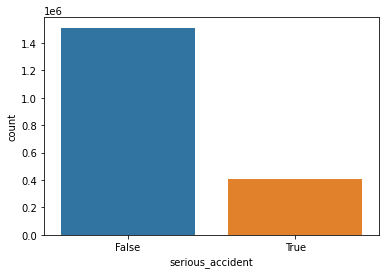

In [20]:
sns.countplot(x='serious_accident',data=df,
               order = df['serious_accident'].value_counts().index)

### Upsampling

In [37]:
df_majority1 = df[df['serious_accident']==False]         
df_minority1 = df[df['serious_accident']==True] 

df_minority_upsampled1 = resample(df_minority1,
                                   replace=True, # sample without replacement
                                   n_samples=1510524, # to match majority class
                                   random_state=123) # reproducable results
df_upsampled1 = pd.concat([df_minority_upsampled1, df_majority1])

### Downsampling (if needed)

In [21]:
df_majority1 = df[df['serious_accident']==False]         
df_minority1 = df[df['serious_accident']==True] 

df_majority_downsampled1 = resample(df_majority1,
                                   replace=False, # sample without replacement
                                   n_samples=411137, # to match minority class
                                   random_state=123) # reproducable results

df_downsampled1 = pd.concat([df_majority_downsampled1, df_minority1])

<AxesSubplot:xlabel='serious_accident', ylabel='count'>

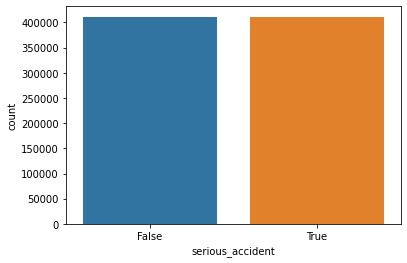

In [22]:
# Check cless imbalances

sns.countplot(x='serious_accident',data=df_downsampled1,
               order = df_downsampled1['serious_accident'].value_counts().index)

In [23]:
# Check downsampled counts
df_downsampled1.serious_accident.value_counts()

False    411137
True     411137
Name: serious_accident, dtype: int64

In [24]:
df_downsampled1.columns

Index(['borough', 'zip_code', 'latitude', 'longitude', 'on_street_name',
       'cross_street_name', 'off_street_name', 'contributing_factor_vehicle_1',
       'contributing_factor_vehicle_2', 'vehicle_type_code_1',
       'vehicle_type_code_2', 'hour', 'year', 'month', 'day_of_week',
       'serious_accident'],
      dtype='object')

# AdaBoost Classification Model

In [21]:
print('On Street unique value: ', df_downsampled1['on_street'].unique())
print('Contact Factor (Veh 1) unique value: ', df_downsampled1['cont_fact_veh1'].unique())
print('Vehicle type unique value: ', df_downsampled1['veh_type'].unique())
print('Month unique value: ', df_downsampled1['month'].unique())

On Street unique value:  ['' 'WEST 145 STREET                 ' 'VAN WYCK EXPWY                  '
 ... 'SUMMERFIELD PLACE               ' 'KNOLLS CRESCENT                 '
 'SANDS PLACE                     ']
Contact Factor (Veh 1) unique value:  ['Passing or Lane Usage Improper' 'Driver Inattention/Distraction'
 'Unsafe Lane Changing' 'Unspecified' 'Unsafe Speed' 'Oversized Vehicle'
 'Driverless/Runaway Vehicle' 'Following Too Closely' 'Other Vehicular'
 'Pedestrian/Bicyclist/Other Pedestrian Error/Confusion'
 'Failure to Yield Right-of-Way' 'Steering Failure' 'Alcohol Involvement'
 'Reaction to Uninvolved Vehicle' 'Passenger Distraction'
 'View Obstructed/Limited' 'Backing Unsafely' 'Outside Car Distraction'
 'Passing Too Closely' 'Turning Improperly' 'Driver Inexperience'
 'Brakes Defective' 'Pavement Slippery' 'Animals Action'
 'Traffic Control Disregarded' 'Aggressive Driving/Road Rage'
 'Fell Asleep' 'Cell Phone (hand-Held)' 'Failure to Keep Right'
 'Pavement Defective' 'Physic

In [120]:
# Drop target predictors 
# df_upsampled1.drop(['location'], axis=1, inplace=True)

In [42]:
df.columns

Index(['borough', 'zip_code', 'latitude', 'longitude', 'on_street_name',
       'cross_street_name', 'off_street_name', 'contributing_factor_vehicle_1',
       'contributing_factor_vehicle_2', 'vehicle_type_code_1',
       'vehicle_type_code_2', 'hour', 'year', 'month', 'day_of_week',
       'serious_accident'],
      dtype='object')

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1921661 entries, 0 to 1921678
Data columns (total 16 columns):
 #   Column                         Dtype  
---  ------                         -----  
 0   borough                        object 
 1   zip_code                       object 
 2   latitude                       float64
 3   longitude                      float64
 4   on_street_name                 object 
 5   cross_street_name              object 
 6   off_street_name                object 
 7   contributing_factor_vehicle_1  object 
 8   contributing_factor_vehicle_2  object 
 9   vehicle_type_code_1            object 
 10  vehicle_type_code_2            object 
 11  hour                           object 
 12  year                           int64  
 13  month                          int64  
 14  day_of_week                    int64  
 15  serious_accident               bool   
dtypes: bool(1), float64(2), int64(3), object(10)
memory usage: 236.4+ MB


In [25]:
df_downsampled1['borough'] = df_downsampled1['borough'].astype('str')
df_downsampled1['zip_code'] = df_downsampled1['zip_code'].astype('str')
df_downsampled1['on_street_name'] = df_downsampled1['on_street_name'].astype('str')
df_downsampled1['off_street_name'] = df_downsampled1['off_street_name'].astype('str')
df_downsampled1['cross_street_name'] = df_downsampled1['cross_street_name'].astype('str')
df_downsampled1['vehicle_type_code_1'] = df_downsampled1['vehicle_type_code_1'].astype('str')
df_downsampled1['vehicle_type_code_2'] = df_downsampled1['vehicle_type_code_2'].astype('str')
df_downsampled1['contributing_factor_vehicle_1'] = df_downsampled1['contributing_factor_vehicle_1'].astype('str')
df_downsampled1['contributing_factor_vehicle_2'] = df_downsampled1['contributing_factor_vehicle_2'].astype('str')

In [26]:
LE = LabelEncoder()
df_downsampled1['borough'] = LE.fit_transform(df_downsampled1['borough'])
df_downsampled1['zip_code'] = LE.fit_transform(df_downsampled1['zip_code'])
df_downsampled1['on_street_name'] = LE.fit_transform(df_downsampled1['on_street_name'])
df_downsampled1['off_street_name'] = LE.fit_transform(df_downsampled1['off_street_name'])
df_downsampled1['cross_street_name'] = LE.fit_transform(df_downsampled1['cross_street_name'])
df_downsampled1['vehicle_type_code_1'] = LE.fit_transform(df_downsampled1['vehicle_type_code_1'])
df_downsampled1['vehicle_type_code_2'] = LE.fit_transform(df_downsampled1['vehicle_type_code_2'])
df_downsampled1['contributing_factor_vehicle_1'] = LE.fit_transform(df_downsampled1['contributing_factor_vehicle_1'])
df_downsampled1['contributing_factor_vehicle_2'] = LE.fit_transform(df_downsampled1['contributing_factor_vehicle_2'])


In [27]:
df_downsampled1

,borough,zip_code,latitude,longitude,on_street_name,cross_street_name,off_street_name,contributing_factor_vehicle_1,contributing_factor_vehicle_2,vehicle_type_code_1,vehicle_type_code_2,hour,year,month,day_of_week,serious_accident
406910,1,145,40.627090,-73.944030,2171,9939,85540,18,57,528,604,11,2019,6,3,False
384051,3,1,40.725750,-73.831260,10801,10159,85540,11,57,538,618,17,2019,7,1,False
187494,3,1,40.722584,-73.850900,11796,3616,85540,57,57,528,604,19,2021,10,5,False
165946,4,204,40.677550,-73.744660,8471,10159,32283,57,57,538,604,16,2020,4,3,False
1716583,4,212,40.692518,-73.859097,6799,1810,85540,57,57,417,473,15,2013,7,5,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1921664,1,147,40.661997,-73.919593,5045,8399,85540,57,29,508,456,15,2012,7,1,True
1921665,4,131,40.767228,-73.918907,1041,1041,85540,11,29,417,456,15,2012,7,6,True
1921669,1,167,40.677288,-73.928227,2123,7911,85540,11,57,508,61,18,2012,7,0,True
1921671,1,153,40.636133,-73.972736,4297,10215,85540,57,57,417,41,0,2012,7,0,True


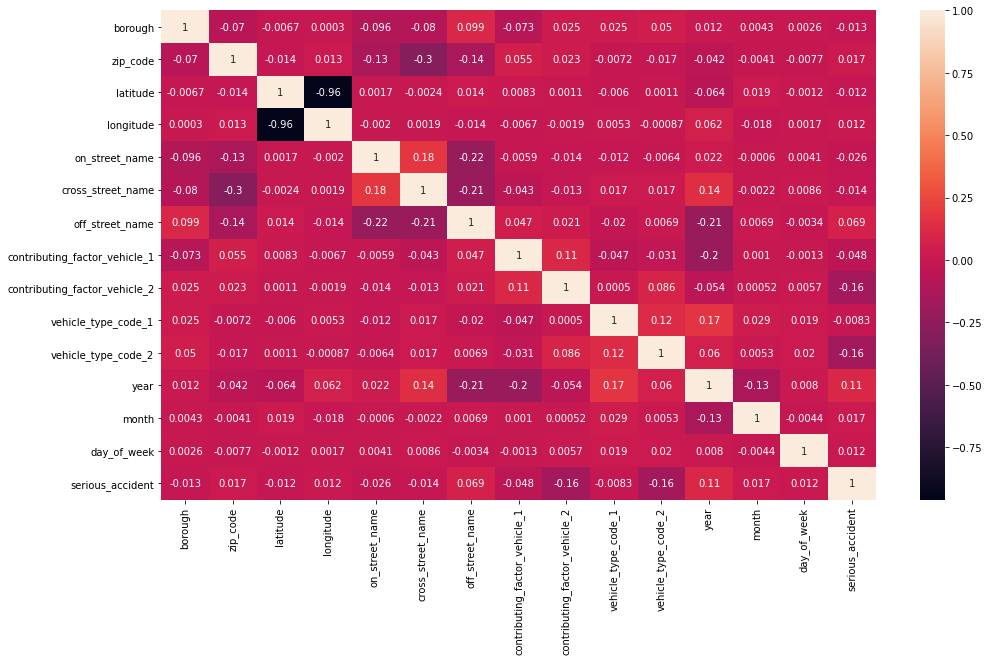

In [28]:
plt.figure(figsize=(16,9))
ax = sns.heatmap(df_downsampled1.corr(), annot=True)
plt.show()

In [29]:
df_downsampled1.isna().sum()

borough                          0
zip_code                         0
latitude                         0
longitude                        0
on_street_name                   0
cross_street_name                0
off_street_name                  0
contributing_factor_vehicle_1    0
contributing_factor_vehicle_2    0
vehicle_type_code_1              0
vehicle_type_code_2              0
hour                             0
year                             0
month                            0
day_of_week                      0
serious_accident                 0
dtype: int64

In [30]:
x = df_downsampled1.drop('serious_accident', axis=1)
y = df_downsampled1['serious_accident']

In [31]:
from sklearn.model_selection import train_test_split

x_train2, x_test2 , y_train2 ,y_test2 = train_test_split(x,y,test_size =0.3, random_state=5)

# print the data
x_train2.head()

,borough,zip_code,latitude,longitude,on_street_name,cross_street_name,off_street_name,contributing_factor_vehicle_1,contributing_factor_vehicle_2,vehicle_type_code_1,vehicle_type_code_2,hour,year,month,day_of_week
358617,3,1,40.808784,-73.934790,6251,10159,85540,45,60,538,604,15,2019,8,4
333653,3,1,40.806408,-73.940160,4591,10159,85540,21,57,528,604,19,2022,4,5
578291,2,62,40.779434,-73.947520,4,5907,85540,18,57,528,70,14,2018,9,3
1803451,1,144,40.619749,-74.027715,1755,1338,85540,28,28,60,473,13,2013,2,5
1495258,3,1,40.840827,-73.945958,9315,5212,85540,4,34,417,473,16,2014,8,2


In [32]:
print('x_train: ', x_train2.shape)
print('x_test: ', x_test2.shape)
print('y_train: ', y_train2.shape)
print('y_test: ', y_test2.shape)

x_train:  (575591, 15)
x_test:  (246683, 15)
y_train:  (575591,)
y_test:  (246683,)


In [33]:
from sklearn.ensemble import AdaBoostClassifier
ada3 = AdaBoostClassifier(n_estimators=1000, learning_rate=0.1, random_state=10)
model3 = ada3.fit(x_train2,y_train2)

In [34]:
pred3 = model3.predict(x_test2)
pred3

array([ True, False, False, ...,  True, False,  True])

In [35]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test2, pred3)*100

67.51377273667015

In [36]:
from sklearn.metrics import classification_report
#print classification report for model
print(classification_report(y_test2, pred3))

              precision    recall  f1-score   support

       False       0.65      0.74      0.70    123286
        True       0.70      0.61      0.65    123397

    accuracy                           0.68    246683
   macro avg       0.68      0.68      0.67    246683
weighted avg       0.68      0.68      0.67    246683



<AxesSubplot:>

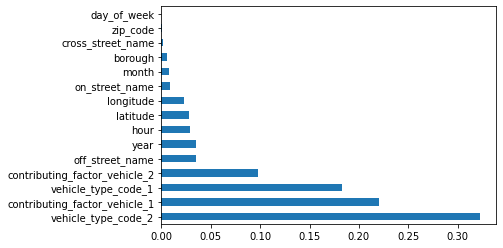

In [39]:
feat_importances = pd.Series(model3.feature_importances_, index=x.columns)
feat_importances.nlargest(20).plot(kind='barh')

### AdaBoost Classifier - Tune Parameters

In [42]:
from sklearn.ensemble import AdaBoostClassifier
ada5 = AdaBoostClassifier(n_estimators=3000, learning_rate=0.1, random_state=10)
model5 = ada5.fit(x_train2,y_train2)

In [44]:
pred5 = model5.predict(x_test2)
pred5

array([ True, False, False, ...,  True, False, False])

In [46]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test2, pred5)*100

68.65410263374451

In [47]:
from sklearn.metrics import classification_report
#print classification report for model
print(classification_report(y_test2, pred5))

              precision    recall  f1-score   support

       False       0.67      0.74      0.70    123286
        True       0.71      0.63      0.67    123397

    accuracy                           0.69    246683
   macro avg       0.69      0.69      0.69    246683
weighted avg       0.69      0.69      0.69    246683



In [55]:
# Convert data types
x_test2 = x_test2.astype({"borough": int, "latitude": float, "longitude":float, "on_street_name":int, "off_street_name":int, "cross_street_name": int, "contributing_factor_vehicle_1":int, "contributing_factor_vehicle_1": int,"vehicle_type_code_1":int, "vehicle_type_code_2":int, "hour":int})


In [56]:
# Convert data types on train set

x_train2 = x_train2.astype({"borough": int, "latitude": float, "longitude":float, "on_street_name":int, "off_street_name":int, "cross_street_name": int, "contributing_factor_vehicle_1":int, "contributing_factor_vehicle_1": int,"vehicle_type_code_1":int, "vehicle_type_code_2":int, "hour":int})


## Logistic Regression, XGBoost, Random Forest Classifier

In [72]:
import xgboost as xgb
from sklearn.metrics import log_loss
 
# importing machine learning models for prediction
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
 
# importing voting classifier
from sklearn.ensemble import VotingClassifier
# initializing all the model objects with default parameters
model_1 = LogisticRegression()
model_2 = XGBClassifier()
model_3 = RandomForestClassifier()
 
# Making the final model using voting classifier
final_model2 = VotingClassifier(
    estimators=[('lr', model_1), ('xgb', model_2), ('rf', model_3)], voting='soft')

#ensemble = VotingClassifier(estimators,voting='soft')

10.0035812628878


In [59]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test2, pred_final))

Accuracy: 0.7104137698990202


In [65]:
from sklearn.metrics import classification_report
#print classification report for model
print(classification_report(y_test2, pred_final))

              precision    recall  f1-score   support

       False       0.68      0.78      0.73    123286
        True       0.75      0.64      0.69    123397

    accuracy                           0.71    246683
   macro avg       0.71      0.71      0.71    246683
weighted avg       0.71      0.71      0.71    246683



##### Voting Classifier Tuned (level=soft)

In [74]:
 
# training all the model on the train dataset
final_model2.fit(x_train2, y_train2)
 
# predicting the output on the test dataset
pred_final2 = final_model2.predict(x_test2)
 
# printing log loss between actual and predicted value
print(log_loss(y_test2, pred_final2))

9.879111330244612


In [77]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test2, pred_final2))

Accuracy: 0.7139729936801482


In [76]:
from sklearn.metrics import classification_report
#print classification report for model
print(classification_report(y_test2, pred_final2))

              precision    recall  f1-score   support

       False       0.69      0.78      0.73    123286
        True       0.75      0.65      0.69    123397

    accuracy                           0.71    246683
   macro avg       0.72      0.71      0.71    246683
weighted avg       0.72      0.71      0.71    246683



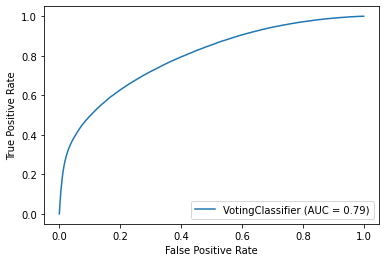

In [75]:
from sklearn import metrics
metrics.plot_roc_curve(final_model2, x_test2, y_test2) 
plt.show()

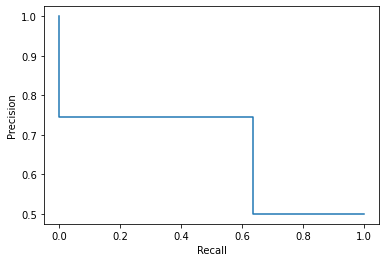

In [69]:
from sklearn.metrics import (precision_recall_curve, PrecisionRecallDisplay)
precision, recall, _ = precision_recall_curve(y_test2, pred_final)
disp = PrecisionRecallDisplay(precision=precision, recall=recall)
disp.plot()

plt.show()

In [18]:
df.longitude.describe()

count    395287.000000
mean        -73.634704
std           4.527111
min         -74.253006
25%         -73.962540
50%         -73.918720
75%         -73.861860
max           0.000000
Name: longitude, dtype: float64

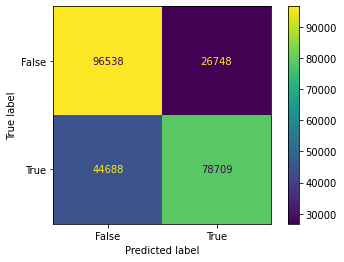

In [68]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(final_model, x_test2, y_test2)  
plt.show()

# AutoML/Pycaret: Best Model

In [82]:
train_data = df_downsampled1.sample(frac=0.95, random_state=95)
test_data = df_downsampled1.drop(train_data.index)

In [83]:
import pycaret
from pycaret.classification import *

clf = setup(train_data, 
            target = 'serious_accident', 
            session_id=123, 
            log_experiment=True, 
            experiment_name='crash-severity'
 )

,Description,Value
0,session_id,123
1,Target,serious_accident
2,Target Type,Binary
3,Label Encoded,"False: 0, True: 1"
4,Original Data,"(781160, 16)"
5,Missing Values,False
6,Numeric Features,11
7,Categorical Features,4
8,Ordinal Features,False
9,High Cardinality Features,False


In [ ]:
best_model = compare_models()

IntProgress(value=0, description='Processing: ', max=79)

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,21:50:27
Status,. . . . . . . . . . . . . . . . . .,Fitting 10 Folds
Estimator,. . . . . . . . . . . . . . . . . .,Extra Trees Classifier


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.6985,0.7733,0.6388,0.7254,0.6793,0.3970,0.3999,73.2700
gbc,Gradient Boosting Classifier,0.6956,0.7682,0.5878,0.7494,0.6588,0.3912,0.4007,132.0030
ada,Ada Boost Classifier,0.6642,0.7329,0.6081,0.6849,0.6442,0.3284,0.3305,12.4970
ridge,Ridge Classifier,0.6323,0.0000,0.5725,0.6502,0.6089,0.2646,0.2665,0.4450
lda,Linear Discriminant Analysis,0.6323,0.6706,0.5725,0.6502,0.6089,0.2645,0.2664,4.0560
dt,Decision Tree Classifier,0.6308,0.6308,0.6325,0.6303,0.6314,0.2616,0.2616,4.7900
nb,Naive Bayes,0.6091,0.6483,0.4164,0.6773,0.5157,0.2181,0.2364,0.8890
lr,Logistic Regression,0.6058,0.6312,0.5166,0.6290,0.5671,0.2116,0.2152,7.8840
knn,K Neighbors Classifier,0.5947,0.6289,0.6021,0.5933,0.5977,0.1894,0.1894,532.2450
svm,SVM - Linear Kernel,0.5279,0.0000,0.3979,0.5918,0.3255,0.0557,0.0779,50.4320
